https://github.com/mardani72/Facies-Classification-Machine-Learning/blob/master/Facies_Classification_Various_ML_Final.ipynb

* **GR**: this wireline logging tools measure gamma emission from formation. Good index for shale content
* **ILD_LOG10**: this is resistivity measurment which is applicable for identification of reservoir fluid content
* **PE**: photoelectric effect log can be used for lithology (mineral contet of rock) identificaiton
* **DPHI**: Phi is porosity index in petrophysics. To measure porosity, there serval methods such as neutron and density. This is differences between them
* **PNHIND**: Average of neutron and density log
* **NM_M**:nonmarine-marine indicator
* **RELPOS**: relative position

Description of 9 discrete facies
1. **(SS)** Nonmarine sandstone
2. **(CSiS)** Nonmarine coarse siltstone
3. **(FSiS)** Nonmarine fine siltstone
4. **(SiSH)** Marine siltstone and shale
5. **(MS)** Mudstone (limestone)
6. **(WS)** Wackestone (limestone)
7. **(D)** Dolomite
8. **(PS)** Packstone-grainstone (limestone)
9. **(BS)** Phylloid-algal bafflestone (limestone)

## Dataset

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# create dataset and display
dataset = pd.read_csv('https://raw.githubusercontent.com/ikiearth/FACIES-CLASIFICATION/main/facies_vectors.csv')
dataset.head()

,FACIES,FORMATION,WELL,DEPTH,GR,ILD_LOG10,DPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [3]:
# describe statistical information of dataset
dataset.describe()

,FACIES,DEPTH,GR,ILD_LOG10,DPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [4]:
# determine value counts for categorical and labeled integer feature (i.e., well, formation, marker, facies)
dataset['WELL'].value_counts()

CROSS H CATTLE     501
SHRIMPLIN          471
ALEXANDER D        466
NEWBY              463
LUKE G U           461
SHANKLE            449
KIMZEY A           439
NOLAN              415
CHURCHMAN BIBLE    404
Recruit F9          80
Name: WELL, dtype: int64

In [5]:
dataset['FORMATION'].value_counts()

C LM     662
A1 LM    591
A1 SH    422
C SH     392
B5 LM    362
B1 SH    335
B3 SH    270
B4 SH    259
B2 SH    212
B1 LM    210
B2 LM    176
B5 SH     96
B4 LM     88
B3 LM     74
Name: FORMATION, dtype: int64

In [6]:
dataset['FACIES'].value_counts()

2    940
3    780
8    686
6    582
5    296
4    271
1    268
9    185
7    141
Name: FACIES, dtype: int64

In [7]:
dataset['NM_M'].value_counts()

2    2151
1    1998
Name: NM_M, dtype: int64

In [8]:
dataset.dtypes

FACIES         int64
FORMATION     object
WELL          object
DEPTH        float64
GR           float64
ILD_LOG10    float64
DPHI         float64
PHIND        float64
PE           float64
NM_M           int64
RELPOS       float64
dtype: object

Change into categorical data

In [9]:
# change well and formation into categorical data

dataset['WELL'] = dataset['WELL'].astype('category')
dataset['FORMATION'] = dataset['FORMATION'].astype('category')
dataset['NM_M'] = dataset['NM_M'].astype('category')
dataset['FACIES'] = dataset['FACIES'].astype('category')

Remove data points that don't have a valid PE entry

In [10]:
# remove data point that doesn't have a valid PE entry
PE_Mask = dataset['PE'].notnull().values
dataset = dataset[PE_Mask]

In [11]:
# describe dataset after cleanup
dataset.describe()

,DEPTH,GR,ILD_LOG10,DPHI,PHIND,PE,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,0.520287
std,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.286792
min,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,0.010000
25%,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,0.273000
50%,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,0.526000
75%,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,0.767250
max,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,1.000000


Remove a single well (named NOLAN) to use as blind test later

In [12]:
blind_dataset = dataset[dataset['WELL'] == 'NOLAN']
training_dataset = dataset[dataset['WELL'] != 'NOLAN']

In [13]:
training_dataset.describe()

,DEPTH,GR,ILD_LOG10,DPHI,PHIND,PE,RELPOS
count,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000
mean,2863.865815,65.758900,0.650132,3.622337,13.672645,3.705430,0.516056
std,134.346582,30.556841,0.245490,5.520167,8.017761,0.897332,0.286780
min,2573.500000,13.280000,-0.025949,-21.832000,0.550000,0.200000,0.010000
25%,2769.500000,47.110000,0.493000,1.100000,8.350000,3.100000,0.268000
50%,2872.500000,65.156000,0.630021,3.600000,12.170000,3.533000,0.517000
75%,2972.500000,78.950000,0.824000,6.800000,16.650000,4.300000,0.765000
max,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,1.000000


In [14]:
blind_dataset.describe()

,DEPTH,GR,ILD_LOG10,DPHI,PHIND,PE,RELPOS
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000
mean,2957.000000,68.693940,0.592400,3.134070,12.197361,3.857947,0.549007
std,59.972216,32.730216,0.208885,2.430493,4.841170,0.877678,0.285563
min,2853.500000,13.250000,-0.019000,-5.054000,2.774000,2.498000,0.017000
25%,2905.250000,43.390500,0.488000,1.313500,8.358500,3.165000,0.307000
50%,2957.000000,72.375000,0.578000,2.713000,11.783000,3.598000,0.577000
75%,3008.750000,88.500000,0.728000,4.933500,15.289500,4.568000,0.793500
max,3060.500000,247.500000,0.992000,10.693000,27.267000,8.063000,1.000000


In [15]:
training_dataset['WELL'].value_counts()

CROSS H CATTLE     501
SHRIMPLIN          471
NEWBY              463
LUKE G U           461
SHANKLE            449
CHURCHMAN BIBLE    404
Recruit F9          68
ALEXANDER D          0
KIMZEY A             0
NOLAN                0
Name: WELL, dtype: int64

In [16]:
blind_dataset['WELL'].value_counts()

NOLAN              415
ALEXANDER D          0
CHURCHMAN BIBLE      0
CROSS H CATTLE       0
KIMZEY A             0
LUKE G U             0
NEWBY                0
Recruit F9           0
SHANKLE              0
SHRIMPLIN            0
Name: WELL, dtype: int64

Plot log data for different well

In [17]:
dataset.columns

Index(['FACIES', 'FORMATION', 'WELL', 'DEPTH', 'GR', 'ILD_LOG10', 'DPHI',
       'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

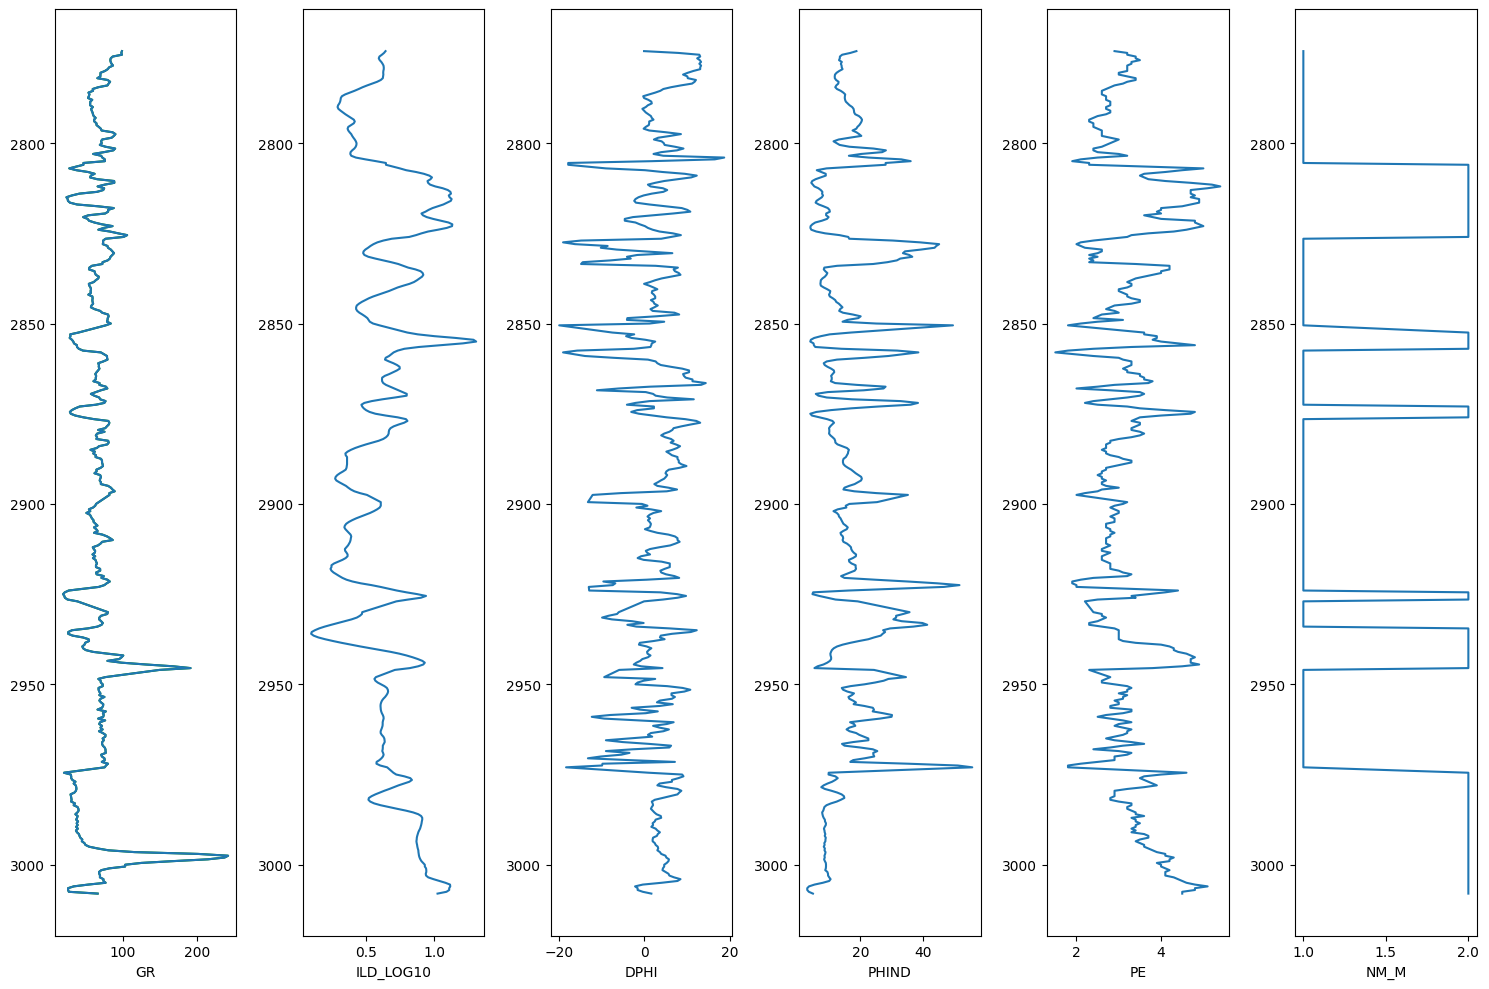

In [18]:
figure, ax = plt.subplots(nrows=1, ncols=6, figsize=(15, 10))
logs = training_dataset[training_dataset['WELL'] == 'SHANKLE']. sort_values(by='DEPTH')
ax[0].plot(logs.GR, logs.DEPTH, color='green')
#ax[1].plot(logs.DPHI, logs.DEPTH, color='red')

features = ['GR', 'ILD_LOG10', 'DPHI', 'PHIND', 'PE', 'NM_M']
for i in range(len(features)):
    ax[i].plot(getattr(logs, features[i]), logs.DEPTH)
    ax[i].invert_yaxis()
    ax[i].set_xlabel(features[i])
plt.tight_layout()



<Axes: title={'center': 'Facies Distribution in Training Dataset'}>

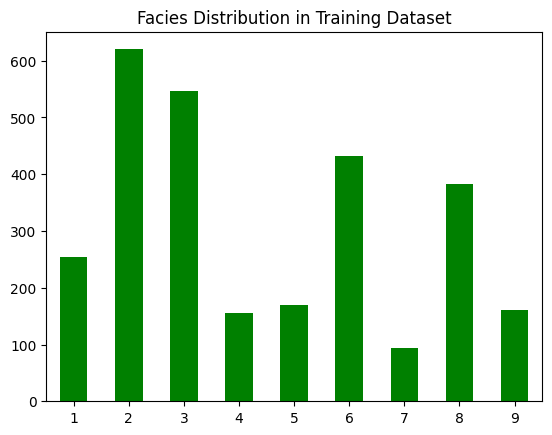

In [19]:
# display bar chart of facies counts in training dataset (excluding blind dataset)

training_dataset['FACIES'].value_counts().sort_index().plot(kind='bar', color = 'g', title='Facies Distribution in Training Dataset', rot=0,)

Pair plot for wireline data reading

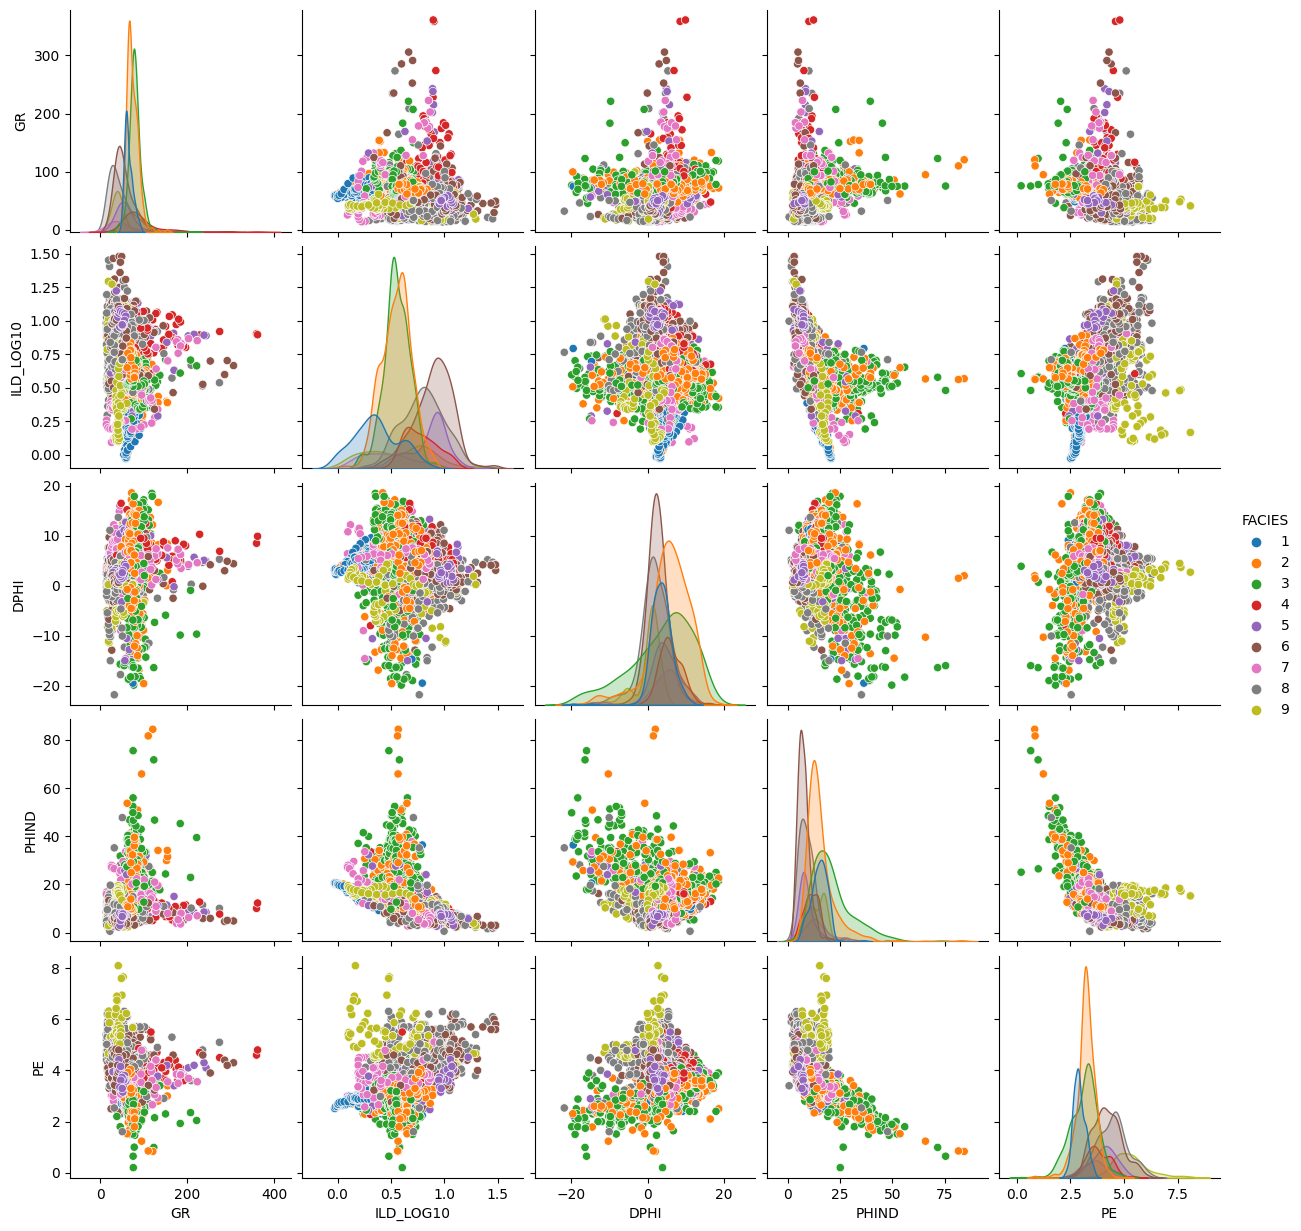

In [20]:
# display pairplot for based on facies category

dummy = training_dataset.drop(['WELL', 'FORMATION', 'DEPTH', 'RELPOS', 'NM_M'], axis=1)
sns.pairplot(dummy, hue='FACIES')

/var/folders/w5/0trdcvnj2sl845mfj4rljf600000gn/T/ipykernel_46359/3079807101.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(training_dataset.corr(), annot=True)


<Axes: >

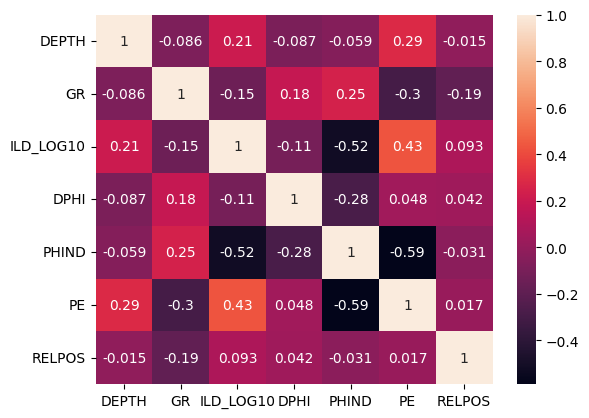

In [21]:
# display correlation matrix

sns.heatmap(training_dataset.corr(), annot=True)

Split into matrix feature and facies label

In [22]:
X = training_dataset.drop(['FORMATION', 'WELL', 'DEPTH', 'FACIES'], axis=1)
y = training_dataset['FACIES']

In [23]:
X.columns

Index(['GR', 'ILD_LOG10', 'DPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'], dtype='object')

Data splitting

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)

Standardization

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## K-nearest Neighbors

### Hyperparameter Tuning

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_distributions = {'C': [1, 5, 10],
                       'kernel': ('linear', 'rbf'),
                       'gamma' : ('scale', 'auto')}

grid_search = GridSearchCV(SVC(),
                           param_grid=param_distributions,
                           scoring='accuracy',
                           cv=10)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 10], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [27]:
grid_search.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [28]:
pd.DataFrame(grid_search.cv_results_).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.026409,0.028727,0.025571,0.028941,0.048986,0.029786,0.048882,0.029815,0.072334,0.031322,0.072239,0.031128
std_fit_time,0.001276,0.000256,0.000486,0.000284,0.001536,0.000323,0.001522,0.00038,0.003076,0.000331,0.002975,0.000351
mean_score_time,0.004269,0.010468,0.003772,0.010333,0.003798,0.009782,0.003778,0.009771,0.003767,0.009611,0.00374,0.009571
std_score_time,0.001177,0.000073,0.000049,0.000131,0.000088,0.000192,0.000064,0.000171,0.000064,0.000175,0.000028,0.000099
param_C,1,1,1,1,5,5,5,5,10,10,10,10
param_gamma,scale,scale,auto,auto,scale,scale,auto,auto,scale,scale,auto,auto
param_kernel,linear,rbf,linear,rbf,linear,rbf,linear,rbf,linear,rbf,linear,rbf
params,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}","{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}","{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}","{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}","{'C': 5, 'gamma': 'scale', 'kernel': 'linear'}","{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}","{'C': 5, 'gamma': 'auto', 'kernel': 'linear'}","{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}","{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}","{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}","{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}","{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}"
split0_test_score,0.529101,0.582011,0.529101,0.582011,0.534392,0.592593,0.534392,0.597884,0.534392,0.613757,0.534392,0.619048
split1_test_score,0.571429,0.656085,0.571429,0.656085,0.571429,0.677249,0.571429,0.677249,0.57672,0.677249,0.57672,0.677249


In [29]:
model = grid_search.best_estimator_
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

### Model Evaluation on Test Set

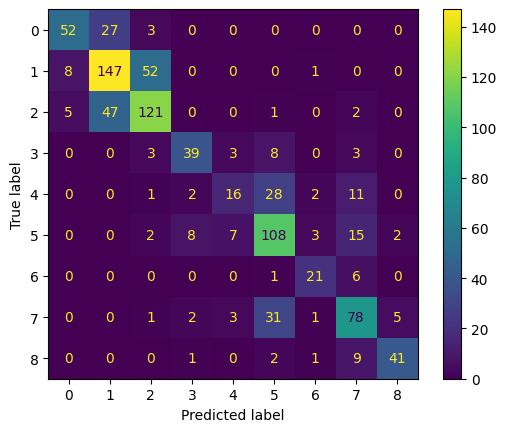

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm).plot()

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.63      0.71        82
           2       0.67      0.71      0.69       208
           3       0.66      0.69      0.67       176
           4       0.75      0.70      0.72        56
           5       0.55      0.27      0.36        60
           6       0.60      0.74      0.67       145
           7       0.72      0.75      0.74        28
           8       0.63      0.64      0.64       121
           9       0.85      0.76      0.80        54

    accuracy                           0.67       930
   macro avg       0.69      0.65      0.67       930
weighted avg       0.67      0.67      0.67       930



### Model Evaluation on Blind Set

In [32]:
# create feature and target matrix from blind dataset
X = blind_dataset.drop(['FORMATION', 'WELL', 'DEPTH', 'FACIES'], axis=1)
y = blind_dataset['FACIES']

In [33]:
# standardize feature matrix
X_blind_scaled = scaler.transform(X)

In [34]:
# predic on blind dataset
y_pred_blind = model.predict(X_blind_scaled)

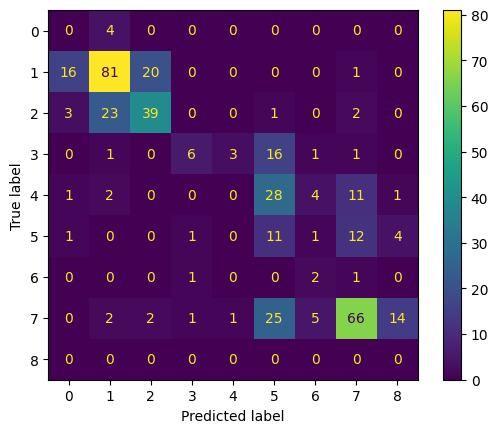

In [35]:
# confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred_blind)
disp = ConfusionMatrixDisplay(cm).plot()

In [36]:
# classification report

from sklearn.metrics import classification_report

print(classification_report(y, y_pred_blind))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.72      0.69      0.70       118
           3       0.64      0.57      0.60        68
           4       0.67      0.21      0.32        28
           5       0.00      0.00      0.00        47
           6       0.14      0.37      0.20        30
           7       0.15      0.50      0.24         4
           8       0.70      0.57      0.63       116
           9       0.00      0.00      0.00         0

    accuracy                           0.49       415
   macro avg       0.33      0.32      0.30       415
weighted avg       0.56      0.49      0.51       415



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

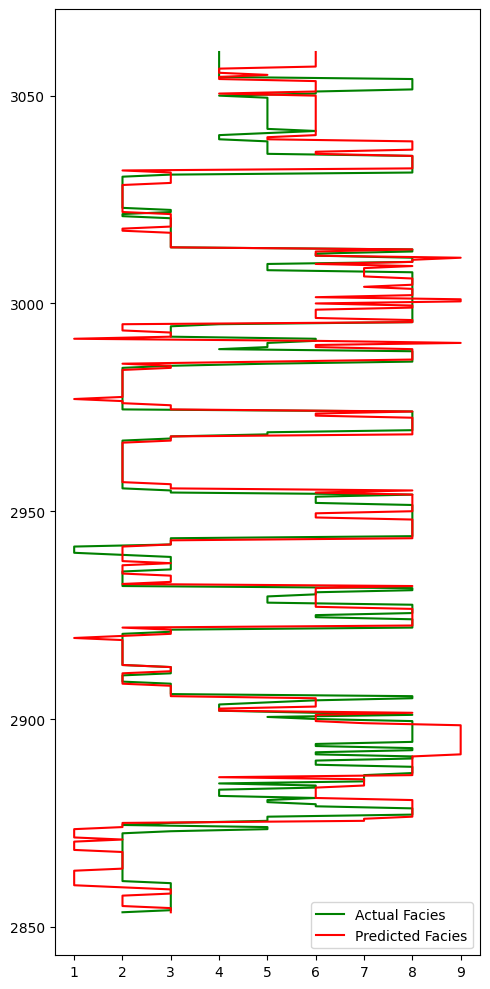

In [37]:
# compare predicted facies with actual facies

figure, ax = plt.subplots(figsize=(5, 10))
logs = blind_dataset[blind_dataset['WELL'] == 'NOLAN']. sort_values(by='DEPTH')
ax.plot(logs.FACIES, logs.DEPTH, color='green', label='Actual Facies')
ax.plot(y_pred_blind, logs.DEPTH, color='red', label='Predicted Facies')

plt.tight_layout()
plt.legend()

In [38]:
# knn = grid_search.best_estimator_
# knn.fit(X_train_scaled, y_train)
# y_pred = knn.predict(X_test_scaled)

In [39]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, y_pred)
# ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_).plot()

In [40]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred))

## Random Forest Classifier

### Hyperparameter Tuning

In [41]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint as sp_randint
# from sklearn.ensemble import RandomForestClassifier

# param_distributions = {'n_estimators': sp_randint(100, 500),
#                        'max_depth': sp_randint(3, 7),
#                        'max_features': sp_randint(1, 7)}
# search = RandomizedSearchCV(RandomForestClassifier(), 
#                            param_distributions, 
#                            scoring='accuracy', cv=10)
# search.fit(X_train_scaled, y_train)

In [42]:
# search.best_params_

In [43]:
# pd.DataFrame(search.cv_results_).transpose()

### Model Evaluation on Test Set

In [44]:
# rf = search.best_estimator_
# rf.fit(X_train_scaled, y_train)
# y_pred = rf.predict(X_test_scaled)

In [45]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, y_pred)
# ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_).plot()

In [46]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred))

## Support Vector Machine

### Hyperparameter Tuning

In [47]:
# from sklearn.svm import SVC

# param_distributions = {'kernel': np.arange(3, 15, 3),
#                        'weights': ['uniform', 'distance']}
# grid_search = GridSearchCV(KNeighborsClassifier(), 
#                            param_distributions, 
#                            scoring='accuracy', cv=10)
# grid_search.fit(X_train_scaled, y_train)

## Evaluation on Blind Set

In [48]:
# create feature and target matrix from blind dataset


In [49]:
# standardization


In [50]:
# predict on blind set


In [51]:
# confusion matrix

In [52]:
# classification report

In [53]:
# compare actual facies with model


Description of 9 discrete facies
1. **(SS)** Nonmarine sandstone
2. **(CSiS)** Nonmarine coarse siltstone
3. **(FSiS)** Nonmarine fine siltstone
4. **(SiSH)** Marine siltstone and shale
5. **(MS)** Mudstone (limestone)
6. **(WS)** Wackestone (limestone)
7. **(D)** Dolomite
8. **(PS)** Packstone-grainstone (limestone)
9. **(BS)** Phylloid-algal bafflestone (limestone)